In [ ]:
#spacy
import spacy
import en_core_web_lg
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc, Span
from spacy.matcher import Matcher, PhraseMatcher 
#from scripts.spacy_model import load_results_auto, load_results_manual

#Visualization
from spacy import displacy
#import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines
import json
import os
import csv
import re
import sys

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

import time
#warning
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
PATH = os.path.dirname((os.getcwd()))
PATH

In [ ]:
#resume data from kaggle - for tryout
df = pd.read_csv("/home/lewagonlew/code/marcorodrigues/skills_matcher/skills_matcher/data/Resume/Resume.csv")


In [ ]:
df.shape

In [ ]:
df = df.reindex(np.random.permutation(df.index))
df = df.copy().iloc[
    0:400,
]
df.head()

In [ ]:
#different cleaning function
def clean_resume(df):
    clean = []
    for i in range(df.shape[0]):
        review = re.sub(
            '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
            " ",
            df["Resume_str"].iloc[i],
        )
        review = review.lower()
        review = review.split()
        lm = WordNetLemmatizer()
        review = [
            lm.lemmatize(word)
            for word in review
            if not word in set(stopwords.words("english"))
        ]
        review = " ".join(review)
        clean.append(review)
    return clean

In [ ]:
df["Clean_Resume"] = clean_resume(df)
df["marked_text"] = df["Clean_Resume"].str.lower().apply(nlp_ms)
df["skills"] = df["marked_text"].apply(create_skill_list)
df.reset_index(inplace = True)
df.head()

In [ ]:
set(flat_list)

In [ ]:
test_resume = nlp_ms(df["Resume_str"].iloc[0])
resume_ents = [(ent.text, ent.label_) for ent in test_resume.ents]
displacy.render(test_resume, style="ent", jupyter=True)
print(resume_ents)

In [ ]:
#functions for getting entities text, label, start and end of character position
def create_skill_set(text, model = False):
    '''Apply basic spacy model and Create a set of the extracted skill entities'''
    
    if model == True:
        nlp_ms = spacy.blank("en")
        skill_pattern_path = PATH + "/data/dictionaries/complete_dict.jsonl"
        ruler = nlp_ms.add_pipe("entity_ruler")
        ruler.from_disk(skill_pattern_path)
        doc = nlp(text)
        
    return set([ent.label_.upper()[6:] for ent in doc.ents if 'skill' or 'knowledge' in ent.label_.lower()])

def create_skill_position(doc):
    '''Create a set of the extracted skill entities of a doc'''
    #nlp_doc = nlp_ms(doc)
    #[(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in sent.ents]
    return list([ent.start_char, ent.end_char, ent.label_] for ent in doc.ents )

#def create_skillset_dict(resume_texts):
#    '''Create a dictionary containing a set of the extracted skills. Name is key, matching skillset is value'''
#    skillsets = [create_skill_set(resume_text) for resume_text in resume_texts]
#   return skillsets

def create_skill_list(text, model = False):
    
    if model == True:
        nlp_ms = spacy.blank("en")
        skill_pattern_path = PATH + "/data/dictionaries/complete_dict.jsonl"
        ruler = nlp_ms.add_pipe("entity_ruler")
        ruler.from_disk(skill_pattern_path)
        doc = nlp_ms(text)
    
    t = list([ent.text] for ent in doc.ents )
    flat_list = [item for sublist in t for item in sublist]
    return set(flat_list)

def match_skills(JD_data_set, cv_set):
    '''Get intersection of resume skills and job offer skills and return match percentage'''
    pct_list = []
    
    if len(cv_set) < 1:
        print('could not extract skills from resume text')   
    else:
        #implement function comparing with a list of job_descriptions
        for i in range(0, len(JD_set)):
            match = cv_set & JD_set[i] 
            qu = len(cv_set & JD_set[i])
            di = len(JD_set[i])
            pct_match = round((qu/di) * 100, 2)
            pct_list.append([i, pct_match])
            
        pct_list.sort(key=lambda x: x[1], reverse = True)
    
        #print("Resume has a {}% skill match on job offer".format(pct_match))
        #print('Required skills: {} '.format(JD_set))
        #print('Matched skills: {} \n'.format(JD_set.intersection(skillset_dict[resume_name])))
        
    return pct_list[0:9]

In [ ]:
# compare df.skills with test_list
cv_set = test_list
JD_set = df.skills
pct_list = match_skills(JD_set, cv_set)

In [ ]:
df.shape()

In [ ]:
pct_list = match_skills(JD_set, cv_set)

In [ ]:
job_number, matching_score, job_cat = [], [], []
frame = pd.DataFrame

for i in pct_list:
    cat = df["Category"][i[0]]
    print('Job #{} in Sector {} has a {}% match'.format(i[0], df["Category"][i[0]], i[1]))
    job_number.append(i[0])
    matching_score.append(i[1])
    
    if cat in job_cat:
        job_cat.append(str(cat) + str(i[0]))
    else:
        job_cat.append(cat)
    
frame = pd.DataFrame(job_number, columns=['job_number'])
frame["matching_score"] = matching_score
frame["Category"] = job_cat
frame["color"][0:2] = 'rgb(240,150,255)'
frame["color"][2:5] = 'blue'
frame["color"][5:8] = 'yellow'
frame["color"][8:] = 'red'

In [ ]:
frame

In [ ]:
## compare list with data_set, visualize highest matching jobs
job_number, matching_score, job_cat = [], [], []
frame = pd.DataFrame

for i in pct_list:
    cat = df["Category"][i[0]]
    print('Job #{} in Sector {} has a {}% match'.format(i[0], df["Category"][i[0]], i[1]))
    job_number.append(i[0])
    matching_score.append(i[1])
    
    if cat in job_cat:
        job_cat.append(str(cat) + str(i[0]))
    else:
        job_cat.append(cat)
    
frame = pd.DataFrame(job_number, columns=['job_number'])
frame["matching_score"] = matching_score
frame["Category"] = job_cat


#for template in ["ggplot2", "seaborn"]:
import plotly.graph_objects as go

fig = px.bar(
    x=frame['Category'], 
    y=frame["matching_score"],
    labels={"x": "job position", "y": "Matching %"},
    title=f"Job offers matching with resume",
    width=1200, height=800,
    template="seaborn",
    color = frame["matching_score"])
fig.update_layout(
        #margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="lightblue",
)
fig.show()

In [ ]:
## comparison of test_resume with automated_annotated_JD data

## Loading Data with pre-trained Spacy Model (Auto/Manual)

In [ ]:
%load_ext autoreload
%autoreload 2
from skills_matcher.scripts.spacy_model import load_results_auto, load_results_manual
from skills_matcher.scripts.utils.clean_skills import extract_skills_auto, extract_entities_2, extract_lables, get_dict, get_dict_cv
from skills_matcher.scripts.utils.paths import load_paths

In [ ]:
PATH = os.path.dirname(os.getcwd()) + "/skills_matcher"
PATH

In [ ]:
PATH

In [ ]:
PATH_DATA, PATH_DICT, PATH_TRAIN_DATA, PATH_VAL_DATA, PATH_COMPLETE_DICT = load_paths('data_final_raw', 'doccano_dictionary', 'train', 'val', 'complete_dict')

In [ ]:
PATH_COMPLETE_DICT

In [ ]:
df_JD = pd.read_csv(PATH_DATA)
df_JD.head()

In [358]:
df_JD.shape

(3507, 9)

# Resume data

In [ ]:
os.chdir('/home/lewagonlew/code/marcorodrigues/skills_matcher')

In [ ]:
os.getcwd()

In [355]:
df_cleaned_Resume

,Resume_str,Resume_html,Category,Clean_Resume,entities_auto_label,entities_manual_label,entity_ruler
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate hr admini...,"(medium, medium)",[],"{'front end', 'data analysis', 'marketing', 'a..."
1,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist u hr operation summary versatile...,"(medium, medium, medium, medium, medium)",[],"{'marketing', 'software', 'material', 'project..."
2,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary 20 year experience recruit...,"(publishing,)",[],"{'monitoring', 'publishing', 'marketing', 'dat..."
3,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...,(),[],"{'monitoring', 'database', 'business administr..."
4,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlight hr skill hr departm...,(),"[{'entity': recruit, 'label': 'KNOWLEDGE'}, {'...","{'business administration', 'impact', 'project..."
...,...,...,...,...,...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank sgt e 5 non commissioned officer charge b...,(),"[{'entity': 'g1', 'label': 'KNOWLEDGE'}]","{'engineering', 'accounting', 'material'}"
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,government relation communication organization...,"(medium, medium, medium, medium, medium)",[],"{'engineering', 'support', 'business', 'accoun..."
2481,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent professional profile support ...,"(android,)",[],"{'android', 'specification', 'software', 'supp..."
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director office manager summary highly...,"(medium, medium)","[{'entity': 'u', 'label': 'LEVEL'}]","{'twitter', 'youtube', 'marketing', 'security'..."


In [356]:
df_cleaned_Resume.to_csv("cleaned_Resume_final.csv")

# concating 2 CV Frames

In [359]:
data_CV = df_cleaned_Resume.apply(get_dict_cv, axis=1)
data_CV

,Resume_str,Resume_html,Category,Clean_Resume,entities_auto_label,entities_manual_label,entity_ruler,SKILL
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate hr admini...,"(medium, medium)",[],"{'front end', 'data analysis', 'marketing', 'a...","[front, end, data, analysis, marketing, accoun..."
1,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist u hr operation summary versatile...,"(medium, medium, medium, medium, medium)",[],"{'marketing', 'software', 'material', 'project...","[marketing, software, material, project, manag..."
2,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary 20 year experience recruit...,"(publishing,)",[],"{'monitoring', 'publishing', 'marketing', 'dat...","[monitoring, publishing, marketing, database, ..."
3,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedicated driven dynamic...,(),[],"{'monitoring', 'database', 'business administr...","[monitoring, database, business, administratio..."
4,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlight hr skill hr departm...,(),"[{'entity': recruit, 'label': 'KNOWLEDGE'}, {'...","{'business administration', 'impact', 'project...","[business, administration, impact, project, ma..."
...,...,...,...,...,...,...,...,...
2479,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,rank sgt e 5 non commissioned officer charge b...,(),"[{'entity': 'g1', 'label': 'KNOWLEDGE'}]","{'engineering', 'accounting', 'material'}","[engineering, accounting, material]"
2480,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,government relation communication organization...,"(medium, medium, medium, medium, medium)",[],"{'engineering', 'support', 'business', 'accoun...","[engineering, support, business, accounting, s..."
2481,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,geek squad agent professional profile support ...,"(android,)",[],"{'android', 'specification', 'software', 'supp...","[android, specification, software, support]"
2482,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,program director office manager summary highly...,"(medium, medium)","[{'entity': 'u', 'label': 'LEVEL'}]","{'twitter', 'youtube', 'marketing', 'security'...","[twitter, youtube, marketing, security, design..."


In [ ]:
skill_list = extract_resume_skills(text, model = True)

In [360]:
text

'PERSONAL DATA\n.\nDate, Place of Birth and Nationality: 06/12/1997 Basel, Switzerland. Swiss.\nAddress: Neumattstrasse 18a, 4103 Bottmingen, Switzerland\n_\nEDUCATION\n.\nDATA SCIENCE BOOTCAMP\nLe Wagon, Lisbon, Portugal                                                                 \n•         9-Week full-time intensive bootcamp to learn Data Science with Python\n•         Final Project: Skills Matcher – helping both recruiters and job seekers through NLP\n           09/2021- Present                                                   \nBACHELOR OF ARTS IN BUSINESS AND ECONOMICS\nUniversity of Basel, Basel, Switzerland\n•         GPA 5.4 (Scale: 1-6)\n•         Relevant courses: Multivariate Data Analysis, Econometrics, Game Theory, Mathematics, Statistics\n           09/2017-12/2020\nSWISS HIGH SCHOOL DIPLOMA (MATURA)\nGymnasium Oberwil, Oberwil Switzerland\n•         Concentration in law and business   09/2018 – 07/2021\n.\nWORK EXPERIENCE\nINTERNSHIP PMO LIFE SCIENCE CONSULTING (10

In [361]:
df_JD

,Unnamed: 0,ISCO,major_job,job,position,location,description,entities_auto_label,entities_manual_label
0,0,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist id54315,"Villigen PSI, Aargau",[' You have an academic degree in physics or e...,(),"[{'entity': physics, 'label': 'KNOWLEDGE'}, {'..."
1,1,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist id54315,"Villigen PSI, Aargau",[' You have an academic degree in physics or e...,(),"[{'entity': RICS, 'label': 'SKILL'}, {'entity'..."
2,2,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist id54315,"Villigen PSI, Aargau",[' You have an academic degree in physics or e...,(),"[{'entity': CIS, 'label': 'SKILL'}, {'entity':..."
3,3,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Applied Physicist (Computing) (EP-LBC-2021-125...,Geneva,[' Be in charge of the development of applicat...,"(Python, Python)","[{'entity': Python, 'label': 'SKILL'}, {'entit..."
4,4,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Applied Physicist (Computing) (EP-LBC-2021-125...,Geneva,[' Be in charge of the development of applicat...,"(Python, Python)",[]
...,...,...,...,...,...,...,...,...,...
3502,3502,22,HEALTH PROFESSIONALS,veterinary surgeon,Veterinary Surgeon,England,[' Allocated CPD funding of 37.5 hours Excelle...,(),"[{'entity': driving licence, 'label': 'KNOWLED..."
3503,3503,22,HEALTH PROFESSIONALS,veterinary surgeon,Permanent Veterinary Surgeon,"Cricklewood, North West London",[' Type: Small Animal Hours: Monday - Friday 4...,(),"[{'entity': driver's license, 'label': 'KNOWLE..."
3504,3504,22,HEALTH PROFESSIONALS,veterinary surgeon,Veterinary Surgeon,"Middlesbrough, North Yorkshire","[' Allocated CPD funding of 37.5 hours ', ' 5 ...",(),"[{'entity': driver's license, 'label': 'KNOWLE..."
3505,3505,22,HEALTH PROFESSIONALS,veterinary surgeon,Permanent Veterinary Surgeon,"Harrogate, North Yorkshire","["" Experienced required: New Graduate level to...",(),"[{'entity': driver's license, 'label': 'KNOWLE..."


In [ ]:
data_cleaned = df_JD.apply(get_dict, axis=1)

In [ ]:
data_CV = df_Resume.apply(get_dict_cv, axis=1)

In [ ]:
data_cleaned.job.unique()

In [ ]:
fig = px.histogram(
    data_cleaned, x="job", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
data_cleaned

In [ ]:
data_cleaned.loc[df_JD['job'] == 'mathematician', ['job', 'position', 'location', 'description',	
                              'entities_auto_label', 'entities_manual_label']]

### Workflow of functions



In [ ]:
def extract_jd(inp = None):
    df_JD = pd.read_csv(PATH_DATA)
    
    if inp == None:
        data = df_JD.apply(get_dict, axis=1)
        data.drop(columns = ["ISCO", "major_job"], inplace = True)
    else:    
        df_JD = df_JD.loc[df_JD['job'] == inp, ['job', 'position', 'location', 'description',	
                              'entities_auto_label', 'entities_manual_label']]
        data = df_JD.apply(get_dict, axis=1)
        data.reset_index(inplace = True)
        
    data.drop(columns = ['entities_auto_label', 'entities_manual_label'], inplace = True)
    
    return data

In [366]:
inp = 'mathematician'

In [407]:
data = extract_jd(inp)
JD_set = data["SKILL"].apply(set)
data.head(50)

,index,job,position,location,description,SKILL,KNOWLEDGE,MIN_EXP,LEVEL
0,784,mathematician,Mathematician,Antrim,[' Design and development of data analysis tec...,"[Excel, VB]","[data analysis, Technical writing, Mathematics...",[],[]
1,785,mathematician,Mathematician,Antrim,[' Design and development of data analysis tec...,[QTS EWC],[],[],[]
2,786,mathematician,Mathematician,Antrim,[' Design and development of data analysis tec...,"[TGI, Share it, MS Excel, MS Power Point, Engl...","[Analyzing, pivot tables, dustrial software]",[],[Bachelor’s]
3,787,mathematician,Mathematician,"Krakow, Malopolskie",[' Quickly bring rough game ideas to life Twea...,"[Java, JavaScript]","[Programming, mathematics, computer science, G...",[],[Degree]
4,788,mathematician,Mathematician,"Krakow, Malopolskie",[' Quickly bring rough game ideas to life Twea...,"[QTS EWC, Java, JavaScript]",[],[],[]
5,789,mathematician,Mathematician,"Krakow, Malopolskie",[' Quickly bring rough game ideas to life Twea...,"[Java, JavaScript]","[Digital Media Ecosystem, administration]",[communication],[Bachelor's]
6,790,mathematician,Mathematician,"Krakow, Malopolskie",[' Quickly bring rough game ideas to life Twea...,"[Java, JavaScript]","[Programming, mathematics, computer science, G...",[],[Degree]
7,791,mathematician,Mathematician,"Krakow, Malopolskie",[' Quickly bring rough game ideas to life Twea...,"[QTS EWC, Java, JavaScript]",[],[],[]
8,792,mathematician,Mathematician,"Krakow, Malopolskie",[' Quickly bring rough game ideas to life Twea...,"[pivot tables, Arts degree, Microsoft Word, Ex...","[Media Director, Science, marketing, communica...",[],[Bachelor]
9,793,mathematician,Mathematician or Computer Scientist researcher,Barcelona,[' Motivation letter Curriculum vitae includin...,[QTS EWC],[],[],[]


In [408]:
pct_list = []
    
#JD_set = list(filter(None, JD_set))

for i in range(0, len(JD_set)):
    if len(JD_set[i]) == 0:
        continue
    else:
        #match = set(cv_set) & JD_set[i] 
        #print(match)
        qu = len(set(cv_set) & JD_set[i])
        di = len(JD_set[i])
        pct_match = round((qu/di) * 100, 2)
        pct_list.append([i, pct_match])
            
#pct_list.sort(key=lambda x: x[1], reverse = True)
new_pct = sorted(pct_list, key=lambda x: x[1], reverse = True)
#pct_list = pct_list[0:10]

new_pct[0:10]

[[48, 10.0],
 [0, 0.0],
 [1, 0.0],
 [2, 0.0],
 [3, 0.0],
 [4, 0.0],
 [5, 0.0],
 [6, 0.0],
 [7, 0.0],
 [8, 0.0]]

In [395]:
cv_set

['data visualization',
 'swiss',
 'keras',
 'material',
 'data science',
 'ms office',
 'matura',
 'notary',
 'activities',
 'heroku',
 'english',
 'devops',
 'communications',
 'customer relationship management',
 'engineering',
 'languages',
 'r',
 'san diego/',
 'interests',
 'word',
 'tensorflow',
 'finance',
 'business',
 'economics',
 'machine learning',
 'blockchain',
 'visualization',
 'sql',
 'personal',
 'internship',
 'shanghai',
 'mathematics',
 'pandas',
 'german',
 'gcp',
 'mlflow',
 'student',
 'statistics\n           09/2017-12/2020',
 '1-6)',
 'python',
 'excel',
 'basel',
 'experience',
 'ag',
 'support',
 'cloud',
 'tensorflow keras',
 'deep learning',
 'seaborn',
 'nlp',
 'data analysis',
 'scikit',
 'optravis llc',
 'ai',
 'game theory',
 'marketing',
 'numpy',
 'agile & devops',
 'switzerland',
 'east',
 'tq']

100 Job as Applied Physicist (trigger development) (EP-CMG-OS-2021-120-LD) in Sector physicist has a 50.0% match
387 Job as Process Chemist in Sector process chemist has a 50.0% match
388 Job as Process Chemist in Sector process chemist has a 50.0% match
802 Job as Mathematician/Natural Scientist (m/f/d) for Management Consulting in Sector mathematician has a 50.0% match
803 Job as Theoretical physicist / Applied Mathematician (80-100%) in Sector mathematician has a 50.0% match
805 Job as Theoretical physicist / Applied Mathematician (80-100%) in Sector mathematician has a 50.0% match
806 Job as Game Mathematician (Quickspin) in Sector mathematician has a 50.0% match
811 Job as Computer scientist, mathematician, physicist or engineer or similar in Sector mathematician has a 50.0% match
815 Job as Computer scientist, mathematician, physicist, engineer or similar (f/m/x) in Sector mathematician has a 50.0% match


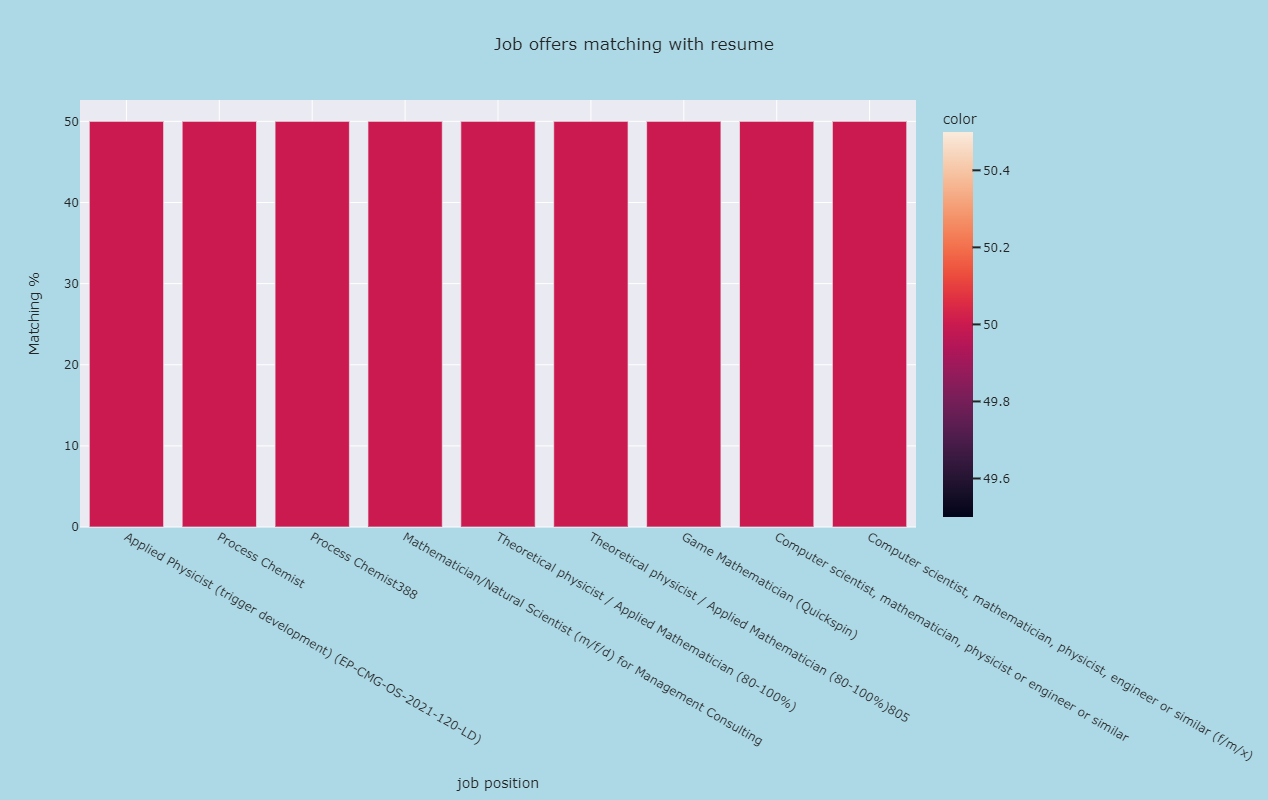

In [405]:
cv_set = skill_list
pct_list = match_skills(JD_set, cv_set, data)
pct_list

In [401]:
data.index[0]

0

In [404]:
def match_skills(JD_set, cv_set, data):
    '''Get intersection of resume skills and job offer skills and return match percentage'''
    pct_list = []
    
    JD_set = list(filter(None, JD_set))
    if len(cv_set) < 1:
        print('could not extract skills from resume text')   
    else:
        #implement function comparing with a list of job_descriptions
        for i in range(0, len(JD_set)):
            if len(JD_set) == 0:
                continue
            #match = set(cv_set) & JD_set[i] 
            qu = len(set(cv_set) & JD_set[i])
            di = len(JD_set[i])
            pct_match = round((qu/di) * 100, 2)
            pct_list.append([i, pct_match])
            
        pct_list.sort(key=lambda x: x[1], reverse = True)
        #new_pct = sorted(pct_list, key=lambda x: x[1], reverse = True)[0:9]
        pct_list = pct_list[0:9]
        
    '''Counting matching score'''
    job_number, matching_score, job_cat = [], [], []
    frame = pd.DataFrame

    for i in pct_list:
        cat = data["position"][i[0]]
        sec = data["job"][i[0]]
        print('{} Job as {} in Sector {} has a {}% match'.format(data.index[i[0]], cat, sec, i[1]))
        #job_number.append(i[0])
        matching_score.append(i[1])

        if cat in job_cat:
            job_cat.append(str(cat) + str(i[0]))
        else:
            job_cat.append(cat)

    frame = pd.DataFrame(job_number, columns=['job_number'])
    frame["matching_score"] = matching_score
    frame["Category"] = job_cat

    
    #Visualizing with plotly
    #for template in ["ggplot2", "seaborn"]:

    fig = px.bar(
        x=frame['Category'], 
        y=frame["matching_score"],
        labels={"x": "job position", "y": "Matching %"},
        title=f"Job offers matching with resume",
        width=1200, height=800,
        template="seaborn",
        color = frame["matching_score"])
    fig.update_layout(
            #margin=dict(l=20, r=20, t=20, b=20),
        paper_bgcolor="lightblue",
    )
    
    return fig.show()

In [ ]:
#different cleaning function
def clean_resume(df):
    clean = []
    for i in range(df.shape[0]):
        review = re.sub(
            '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
            " ",
            df["Resume_str"].iloc[i],
        )
        review = review.lower()
        review = review.split()
        lm = WordNetLemmatizer()
        review = [
            lm.lemmatize(word)
            for word in review
            if not word in set(stopwords.words("english"))
        ]
        review = " ".join(review)
        clean.append(review)
    return clean

In [ ]:
#create skill_set from entity_ruler
def create_skill_list(text, model = False):
    
    if model == True:
        
        skill_pattern_path = PATH_COMPLETE_DICT
        nlp_ms = spacy.blank("en")
        ruler = nlp_ms.add_pipe("entity_ruler")
        ruler.from_disk(skill_pattern_path)
        doc = nlp_ms(text)
    else:
        doc = text
    
    t = list([ent.text.lower()] for ent in doc.ents )
    flat_list = [item for sublist in t for item in sublist]
    return set(flat_list)

In [ ]:
def extract_resume_skills(text):
    
    #model set to False if nlp models (base, trained) were already applied. Set to true if not
    set_list_2 = []
    ext = []
    
    list_1 = create_skill_list(text, model = True)  #get extracted skills with base_model
    list_2 = load_results_manual(text)     #get extracted skills with trained_model  
        
    for i in range(0, len(list_2)):
        set_list_2.append(str(list_2[i]["entity"]).lower().strip())
    set_list_2 = set(set_list_2)
    ext.append(set.union(list_1, set_list_2))
    
    flat_list = [item for sublist in ext for item in sublist]
    set(flat_list)
        
    return flat_list

# Unused code

In [ ]:
job_number, matching_score, job_cat = [], [], []

for i in pct_list:
    cat = df["Category"][i[0]]
    print('Job #{} in Sector {} has a {}% match'.format(i[0], df["Category"][i[0]], i[1]))
    job_number.append(i[0])
    matching_score.append(i[1])
    
    if cat in job_cat:
        job_cat.append(str(cat) + str(i[0]))
    
frame = pd.DataFrame(job_number, columns=['job_number'])
frame["matching_score"] = matching_score
frame["Category"] = df["Category"][i[0]]

In [ ]:
    ## compare list with data_set, visualize highest matching jobs
def 
    job_number, matching_score, job_cat = [], [], []
    frame = pd.DataFrame

    for i in pct_list:
        cat = data_cleaned_small["position"][i[0]]
        print('Job #{} in Sector {} has a {}% match'.format(i[0], cat, i[1]))
        job_number.append(i[0])
        matching_score.append(i[1])

        if cat in job_cat:
            job_cat.append(str(cat) + str(i[0]))
        else:
            job_cat.append(cat)

    frame = pd.DataFrame(job_number, columns=['job_number'])
    frame["matching_score"] = matching_score
    frame["Category"] = job_cat


    #for template in ["ggplot2", "seaborn"]:
    import plotly.graph_objects as go

    fig = px.bar(
        x=frame['Category'], 
        y=frame["matching_score"],
        labels={"x": "job position", "y": "Matching %"},
        title=f"Job offers matching with resume",
        width=1200, height=800,
        template="seaborn",
        color = frame["matching_score"])
    fig.update_layout(
            #margin=dict(l=20, r=20, t=20, b=20),
        paper_bgcolor="lightblue",
    )
    fig.show()

In [ ]:
#functions for getting entities text, label, start and end of character position
"""def create_skill_set(text, model = False):
    '''Apply basic spacy model and Create a set of the extracted skill entities'''
    
    if model == True:
        nlp_ms = spacy.blank("en")
        skill_pattern_path = PATH + "/data/dictionaries/complete_dict.jsonl"
        ruler = nlp_ms.add_pipe("entity_ruler")
        ruler.from_disk(skill_pattern_path)
        doc = nlp(text)
    else:
        doc = text
        
    return set([ent.label_.upper()[6:] for ent in doc.ents if 'skill' or 'knowledge' in ent.label_.lower()])
"""

In [ ]:
fig = px.histogram(
    df, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [ ]:
%%time
#applying trained models on resume dataset
df_Resume['entities_auto_label'] = df_Resume.Clean_Resume.apply(load_results_auto)
df_Resume['entities_manual_label'] = df_Resume.Clean_Resume.apply(load_results_manual)
df_Resume["marked_text"] = df_Resume["Clean_Resume"].str.lower().apply(nlp_ms)
df_Resume["entity_ruler"] = df_Resume["marked_text"].apply(create_skill_list)
df_Resume.reset_index(inplace = True)
df_Resume